## Fundamental Solution

The function $G$ satisfies

$$
-\Delta G(x) = \delta(x) \qquad x \in R^d,
$$

and therefore its Fourier transform in $R^d$ is given by

$$
\hat G = \mathcal F(G) :=  \int_{R^d} G(x) e^{-2\pi \iota <\omega, x>} dx =  \frac{1}{4\pi^2|\omega|^2}
$$
where we use $\iota$ to indicate the imaginary unit.

The analytic expression of $G$ is given by:

$$
G(x) := \frac{1}{(d-1)\pi}
\begin{cases}
-\ln(|x|) & \text{ if } d = 2 \\
|x|^{2-d} & \text{ if } d > 2
\end{cases} 
$$

Since we know its Fourier transform, we also know that

$$
G(r) =  (\mathcal F^{-1}(\hat G))(x) := \int_{R^d} \hat G(\omega) e^{2\pi \iota
<\omega, x>} d\omega = \int_{R^d} \frac{e^{2\pi \iota <\omega, x>}}{4\pi^2 |\omega|^2} d\omega.
$$


## Spherical coordinate change for the inverse Fourier transform

By representing a generic point $\omega\in R^d$ as $\lambda \xi$ where $\xi =
\omega/|\omega|$ is a point on $S^{d-1}$ and $\lambda = |\omega|$, we can
integrate over $R^d$ by splitting integrals in two parts:

$$
\int_{R^d} g(\omega) d\omega = \int_0^{+\infty} \int_{S^{d-1}} g(\lambda, \xi)
\lambda^{d-1}d\xi d\lambda.
$$
If we apply this to the inverse Fourier transform of $G$, we get

$$
G(x) = \int_{R^d} \frac{e^{2\pi \iota <\omega, x>}}{4\pi^2 |\omega|^2} d\omega = \int_0^{+\infty} \int_{S^{d-1}} \frac{e^{2\pi \iota <\omega, x>}}{4\pi^2}
\lambda^{d-3}d\xi d\lambda = \int_0^{+\infty} \lambda^{d-3} \int_{S^{d-1}} \frac{e^{2\pi \iota <\lambda\xi, x>}}{4\pi^2}
d\xi d\lambda
$$

and we can use the fact that 

$$
\int_{S^{d-1}}e^{\iota <\xi, x>} d \xi = 4\pi \ \text{sinc}\left(|x|\right)
\qquad \forall x \in R^3
$$

to rewrite the fundamental solution for $d=3$ as

$$
G(x) = \frac{1}{4\pi |x|} = \frac{1}{2\pi^2}\int_0^{+\infty} \ \text{sinc}\left(\lambda |x| \right) d\lambda
$$

We still need to integrate along the $\lambda$ variable. We look for $\alpha_p,
\lambda_p$, with $p\in[0,P)$, such that

$$
\frac{1}{4\pi |x|} \sim \sum_{p\in[1,P)} \alpha_p \ \text{sinc}\left(\lambda_p |x| \right) 
$$
up to a specified tolerance, at least for $|x| \in [R_{min}, R_{max}]$.

The above is equivalent, after the change of variable $\beta_p =
4\pi\alpha_p/\lambda_p$, to the following

$$
1 \sim \sum_{p\in[1,P)} \beta_p \sin(\lambda_p r)
$$

Let's start by searching for $\beta_p$ and $\lambda_p$, at fixed $P$, that
minimize the $L^2$ distance $D := 1/2\int_{\rho}^{\pi-\rho}|\sum_{p\in[0,P)} \beta_p
\sin((2p+1) r)-1|^2$, in the interval $\rho, \pi-\rho$ (i.e., taking $\lambda_p$
to be odd integers):

$$
\frac{\partial D}{\partial \beta_i} = 0 \quad\Longrightarrow\quad 
\frac{\partial}{\partial \beta_i}\int_{\rho}^{\pi-\rho}\frac12\left\langle \sum_{p\in[0,P)} \beta_p
\sin((2p+1)r)-1, \sum_{q\in[0,P)} \beta_q
\sin((2q+1) r)-1\right\rangle = 0
$$
that is
$$

$$

$$
A_{ij} := \int_{\rho}^{\pi-\rho} \sin((2i+1)r)\sin((2j+1)r) d r \qquad b_i := \int_{\rho}^{\pi-\rho} \sin((2i+1)r) d r 
$$

and we solve for

$$
\beta = A^{-1} \cdot b
$$

In [188]:
# From 
from scipy.integrate import quad
from numpy import *

def least_square_sin(P, rho):

    def integrand(r, i,j):
        return (sin((2*i+1)*r)*sin((2*j+1)*r))

    def integrand2(r, i):
        return sin((2*i+1)*r)
    
    A = array([[quad(integrand, rho, pi-rho,(i,j))[0] for i in range(P)] for j in range(P)])
    b = array([quad(integrand2, rho, pi-rho, i)[0] for i in range(P)])

    return linalg.solve(A, b)

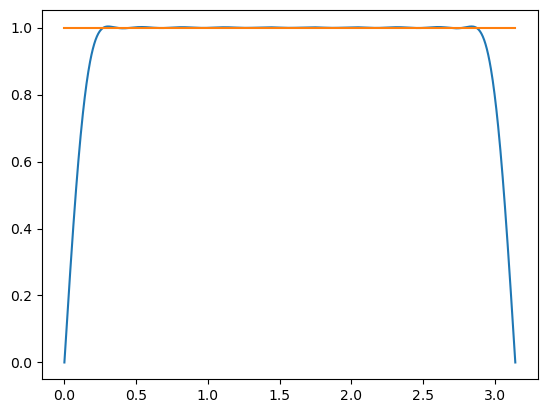

In [189]:
# Plot the function, and the error
from matplotlib.pyplot import *


P = 10
rho = 0.25

beta = least_square_sin(P, rho)

x = linspace(0, pi, 1000)

V = array([sin((2*i+1)*x) for i in range(P)]).T

y = V.dot(beta)

plot(x, y)
plot(x, ones_like(x))

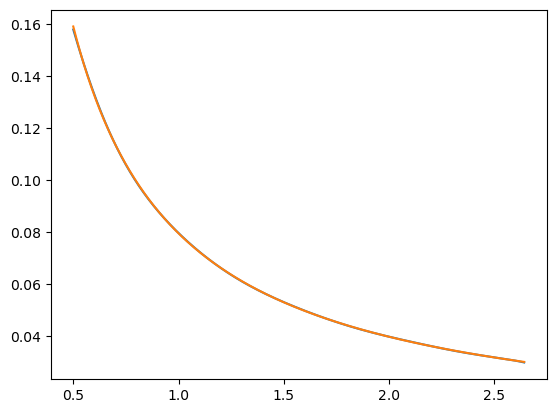

In [190]:
# Now translate this from R_min to R_max, and using the sinc function

def least_square_sinc(P, R_min, R_max):
    delta = pi/(R_max + R_min)
    rho = R_min*delta
    beta = least_square_sin(P, rho)
    lam = array([(2*i+1)*delta for i in range(P)])
    alpha = lam*beta/(4*pi)
    return lam, alpha

# Plot the function, and the error
P = 5
R_min = 0.5
R_max = pi-0.5

lam, alpha = least_square_sinc(P, R_min, R_max)

x = linspace(R_min, R_max, 1000)

S = array([sinc(lam[i]*x/pi) for i in range(P)]).T

y = S.dot(alpha)

plot(x, y)
plot(x, 1/(4*pi*x))

In [191]:
# Use equation 10 in the paper to build the approximants up to a given tolerance

def least_square_sinc_eps(eps, R_min, R_max):
    delta = pi/(R_max + R_min)
    rho = R_min*delta
    P = int(ceil(-log(eps)/(2*sin(rho))))
    return least_square_sinc(P, R_min, R_max)

In [192]:
# Verify the error is below the tolerance for a few cases

eps = [1e-3, 1e-4, 1e-5]
R_min = 0.1
R_max = 2

for e in eps:
    lam, alpha = least_square_sinc_eps(e, R_min, R_max)
    x = linspace(R_min, R_max, 1000)
    S = array([sinc(lam[i]*x/pi) for i in range(len(lam))]).T
    y = S.dot(alpha)
    P = len(alpha)
    print('eps = %e, max error = %e, P = %e' % (e, max(abs(y-1/(4*pi*x))), P))

eps = 1.000000e-03, max error = 8.192267e-04, P = 2.400000e+01
eps = 1.000000e-04, max error = 1.004948e-04, P = 3.100000e+01
eps = 1.000000e-05, max error = 9.118722e-06, P = 3.900000e+01


# Usage in real life scenario

Given a set of points in space as an array of shape `(N,d)`, with charge `f`
of shape `(N,)` where `d=3` is the Euclidean space dimension, and `N` is the
number of charges, we would like to compute the electric field potential $\phi$
at the generic point `y` as

$$
\phi(y) := \sum_{i\in [0,N)} f^i G(y-x_i) := \sum_{i\in [0,N)} \frac{f_i}{4\pi |x_i-y|}
$$

For `M` points `y`, of shape `(M,d)`, this can be computed by the dot product
with the (full) matrix 
$$ 
A_{ij} := G(y_j - x_i) \qquad i \in [0,N), \qquad j\in [0,M)
$$ 
that is:

$$
\phi_j := F(y_i) = \sum_{j\in[0,N)} A_{ij} f^j = (A\cdot f)_i
$$


Therefore:

$$
G(x) = \mathcal F^{-1} \left(\frac{1}{4\pi^2|\omega|^2} \right) = \int_{R^d}
\frac{e^{2\pi \iota <\omega, x>}}{4\pi^2|\omega|^2} d\omega
$$

The computation of the matrix vector product $A \cdot f$ can then be written as 

$$
\sum_{j\in[0,N)} G(y_i-x_j) f^j = \sum_{j\in[0,N)} \left(\int_{R^d}
\frac{e^{2\pi \iota <\omega, y_i-x_j>}}{4\pi^2|\omega|^2} d\omega\right) f^j 
= 
\int_{R^d} e^{2\pi \iota <\omega, y_i>} \left( \sum_{j\in[0,N)} 
\frac{e^{-2\pi \iota <\omega,x_j>}}{4\pi^2|\omega|^2} f^j \right) d\omega
$$

## Spherical coordinate change for the inverse Fourier transform

By representing a generic point $\omega\in R^d$ as $\lambda \xi$ where $\xi =
\omega/|\omega|$ is a point on $S^{d-1}$ and $\lambda = |\omega|$, we can
integrate over $R^d$ by splitting the integral into two parts:
$$
\int_{R^d} g(\omega) d\omega = \int_0^{+\infty} \int_{S^{d-1}} g(\lambda, \xi)
\lambda^{d-1}d\xi d\lambda.
$$

We apply this to the equation above:

$$
A\cdot f = 
\int_{R^d} e^{2\pi \iota <\omega, y_i>} \left( \sum_{j\in[0,N)} 
\frac{e^{-2\pi \iota <\omega,x_j>}}{4\pi^2|\omega|^2} f^j \right) d\omega
=\\
\int_0^{+\infty} \int_{S^{d-1}} e^{2\pi \iota <\lambda\xi, y_i>} \left( \sum_{j\in[0,N)} 
\frac{e^{-2\pi \iota <\lambda\xi,x_j>}}{4\pi^2} f^j \right) \lambda^{d-3}d\xi d\lambda.
$$

and look for quadrature formulas $(\zeta_s,w_s)$ with `Q` points, i.e.,
$s\in[0,Q)$ such that 

$$
A\cdot f \simeq \sum_{s\in[0,Q)} (w_s |\zeta_s|^{d-3}) e^{2\pi \iota <\zeta_s,y_i>} 
\left( \sum_{j\in[0,N)} \frac{e^{-2\pi \iota <\zeta_s,x_j>}}{4\pi^2} f^j \right) 
$$

This allows us to compute the product $A\cdot f$ using the following two steps:

1. Compute $\eta_s := \sum_{j\in[0,N)} (2\pi)^{-2} e^{-2\pi \iota <\zeta_s,x_j>} f^j $
2. Compute $f_i := \sum_{s\in[0,Q)} (w_s |\zeta_s|^{d-3}) e^{2\pi \iota <\zeta_s,y_i>} \eta_s$

Both tasks are $\nu$-FFT transforms of type 3.

## Building spherical quadrature formulas

Now consider the integral along the spherical direction. We use `2M` azimuthal
angles

$$
\theta_k = k \frac{\pi}{M}, \qquad k\in[0,2M)
$$

and integrate along `M` elevation angles, chosen such that 

$$
\cos(\psi_l)
$$

is a zero of the Legendre Polynomial of order `M-1`.

Then 

$$
\xi_{kl} = (\cos(\theta_k) \sin(\psi_l), \sin(\theta_k) \sin(\psi_l), \cos(\psi_l))
$$

In [193]:
from numpy.polynomial.legendre import leggauss
def spherical_quad(M):
    X = zeros((2*M,M, 3))
    W = zeros((2*M,M))
    theta = linspace(0, 2*pi, 2*M)
    cos_psi, w = leggauss(M)
    sin_psi = sqrt(1-cos_psi**2)
    for i in range(2*M):
        for j in range(M):
            X[i,j,:] = array([cos(theta[i])*sin_psi[j], sin(theta[i])*sin_psi[j], cos_psi[j]])
            W[i,j] = w[j]
    return X.reshape((-1,3)), W.reshape((-1,))

In [194]:
# Once we computed the coefficients, we can use them to compute the values of P
# and M so that the tolerance is lower than `eps`

def P_M(eps, R_min, R_max):
    delta = pi/(R_max + R_min)
    rho = R_min*delta
    P = int(ceil(-log(eps)/(2*sin(rho))))
    M = int(ceil((2*P+1)*pi*e/4-1/2*log((2*eps)/sqrt(pi))))
    return P,M

In [195]:
R_min = 0.1
R_max = 2
eps = 1e-5

P, M = P_M(eps, R_min, R_max)
Xl, Wl = least_square_sinc(P, R_min, R_max)
Xs, Ws = spherical_quad(M)

(-2.6399999999999997,
 2.6399999999999997,
 -2.6399999999999997,
 2.6399999999999997)

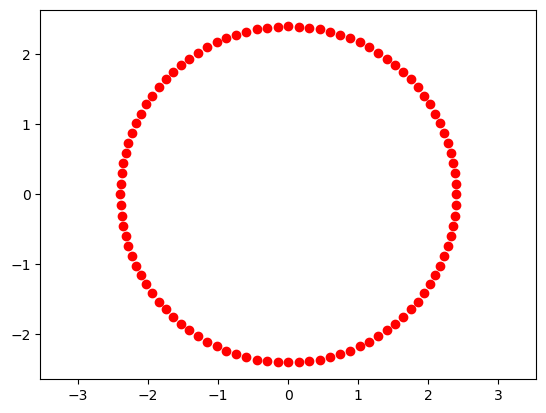

In [196]:
# Build a fundamental solution around a circular domain
R = 2.4
theta, w = linspace(0, 2*pi, 100, endpoint=False, retstep=True)
X = array([R*cos(theta), R*sin(theta)]).T
W = w*ones_like(theta)

# Plot the domain:

plot(X[:,0], X[:,1],'ro')
axis('equal')

In [197]:
# Now compute the solution of -Delta u = 0 everywhere exept on the boundary, where u = 1

In [198]:
# Play with 2D for the moment

def fundamental(r, tol=1e-6):
    return -log(maximum(tol, linalg.norm(r,axis=1)))/(2*pi)

Single layer potential:

$$
u(x) = \int_{\partial B_R} (-1/R) G(x-y) dy
$$

In [199]:
x = linspace(-10,10,500)
xx, yy = meshgrid(x,x)

YY = array([xx.flatten(), yy.flatten()]).T

In [200]:
# Compute the solution at the points YY, using the convolution with the
# fundamental solution

f = (1/R)*ones_like(W)

In [201]:
A = zeros((len(YY), len(X)))

for i in range(len(X)):
    A[:,i] = fundamental(YY-X[i,:])
    

In [202]:
u = A.dot(f*W)

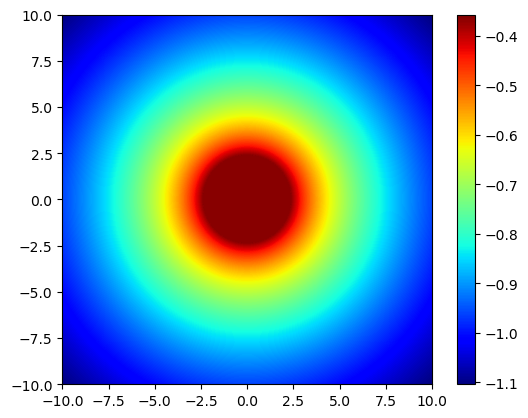

In [203]:
imshow(u.reshape(xx.shape), extent=[-10,10,-10,10], origin='lower', cmap='jet')
# print the colorbar
colorbar()

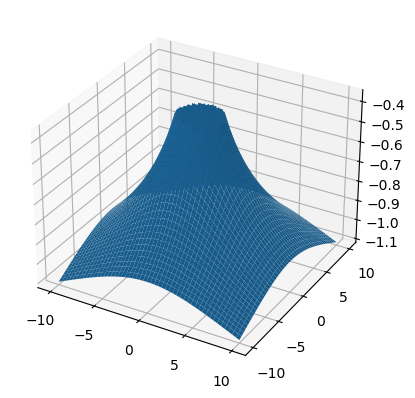

In [204]:
# Create a 3D plot
fig = figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xx, yy, u.reshape(xx.shape))

# Set labels and title

In [205]:
def fundamental_3d(r, tol=1e-6):
    return 1/(maximum(tol, linalg.norm(r,axis=1)))/(4*pi)

In [206]:
# We do the same in 3 dimensions

In [207]:
M = 10
X, W = spherical_quad(M)

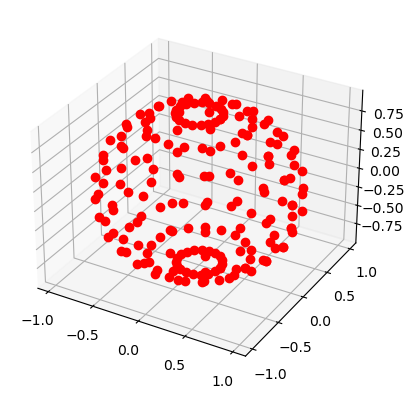

In [208]:
fig = figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(X[:,0], X[:,1], X[:,2], 'ro')

In [209]:
x = linspace(-3,3,100)
xx, yy, zz = meshgrid(x,x,x)

YY = array([xx.flatten(), yy.flatten(), zz.flatten()]).T

A = zeros((len(YY), len(X)))

for i in range(len(X)):
    A[:,i] = fundamental(YY-X[i,:])

In [210]:
f = ones_like(W)

In [211]:
u = A.dot(f)

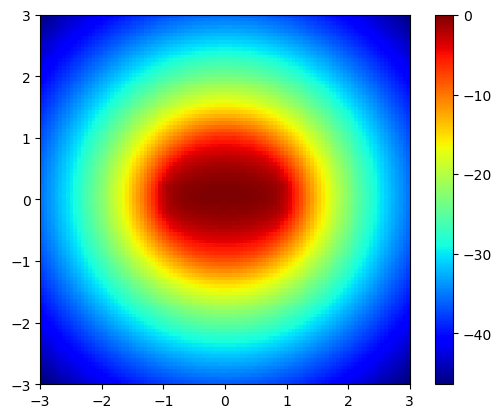

In [212]:
# take the middle slice of the solution u

sid = int(len(x)/2)

uslice = u.reshape(xx.shape)[sid,:,:]

xx_slice = xx[sid,:,:]
yy_slice = yy[sid,:,:]
zz_slice = zz[sid,:,:]

imshow(uslice, extent=[-3,3,-3,3], origin='lower', cmap='jet')
# print the colorbar
colorbar()

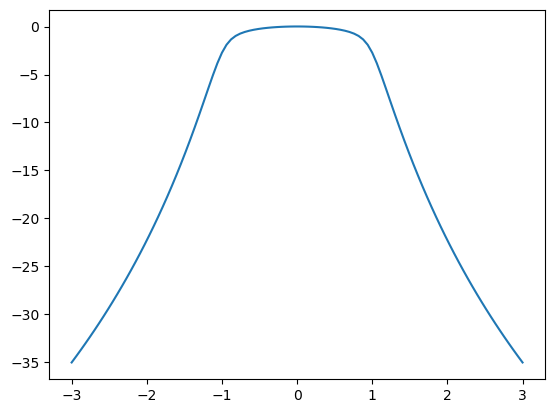

In [213]:
# Again the middle slide of the solution. This is now a 2d plot.
plot(zz_slice[sid,:], uslice[sid,:])